In [1]:
# imports
from utils import *
from lightgbm import LGBMClassifier
import pickle


2025-03-13 16:50:52.337620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741881052.356299   46209 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741881052.361246   46209 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1741881052.373927   46209 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741881052.373945   46209 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741881052.373946   46209 computation_placer.cc:177] computation placer alr

In [2]:
# read the configuration file and initialize random generators
cfg = read_config('configfiles/config.yaml')
seeds = read_config('configfiles/seed_config.yaml')
initalize_random_generators(seeds)

In [3]:
categories = ["Toilet","Shower","Faucet","ClothesWasher","Dishwasher","Bathtub"]
def map_to_category(y: int, categories: list):
    y = int(y)
    return categories[y-1]

allData = pd.read_csv(cfg['dataset'])

In [4]:
# process dataset (separate features & classes, split in train and test, reduce train size if needed)
X_cv, X_test, y_cv, y_test = data_prep(allData, cfg['features'], cfg['target'],
                                       randomState=seeds['dprep_seed'], 
                                       testSize=cfg['frac_tst'], 
                                       trainSize=cfg['train_size'])

y_cv = y_cv.map(lambda x: map_to_category(x, categories))
y_test = y_test.map(lambda x: map_to_category(x, categories))

In [5]:
model_params = pd.read_pickle('best_models_wo_smote')['params'][0]
lgbm = LGBMClassifier(**model_params)
lgbm.fit(X_cv, y_cv)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 114128, number of used features: 6
[LightGBM] [Info] Start training from score -6.206997
[LightGBM] [Info] Start training from score -2.875569
[LightGBM] [Info] Start training from score -3.684403
[LightGBM] [Info] Start training from score -0.439382
[LightGBM] [Info] Start training from score -3.597886
[LightGBM] [Info] Start training from score -1.407834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

LGBMClassifier(device='cpu', learning_rate=0.08, max_depth=5, n_estimators=1000,
               n_jobs=-1)

In [6]:
y_hat = lgbm.predict(X_test)

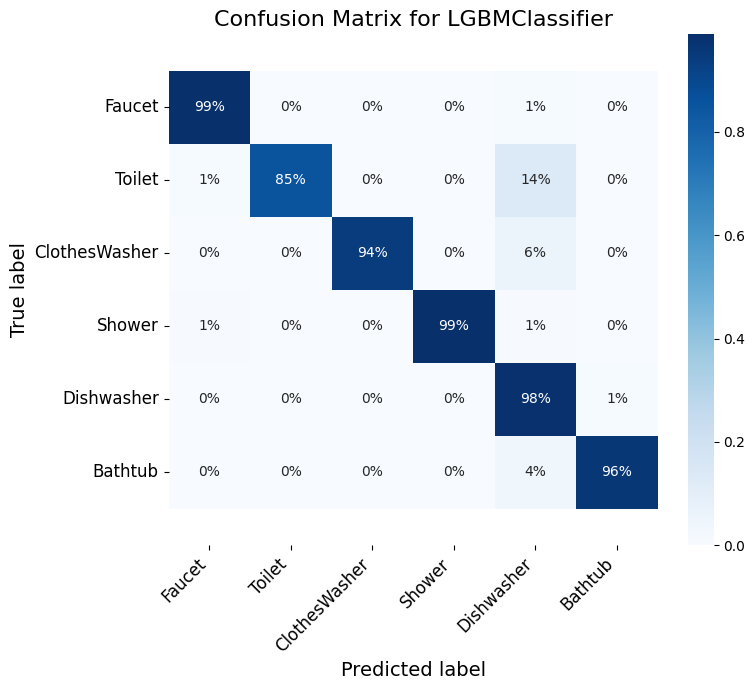

In [7]:
_, ax = get_confusion_matrix(y_test, y_hat, plot=True, labels=categories)
ax.set_title('Confusion Matrix for LGBMClassifier', fontsize=16)
plt.tight_layout()

In [8]:
pickle.dump(lgbm, open('lgbm_model.pkl', 'wb'))

In [9]:
lgbm = pickle.load(open('lgbm_model.pkl', 'rb'))
y_hat = lgbm.predict(X_test)

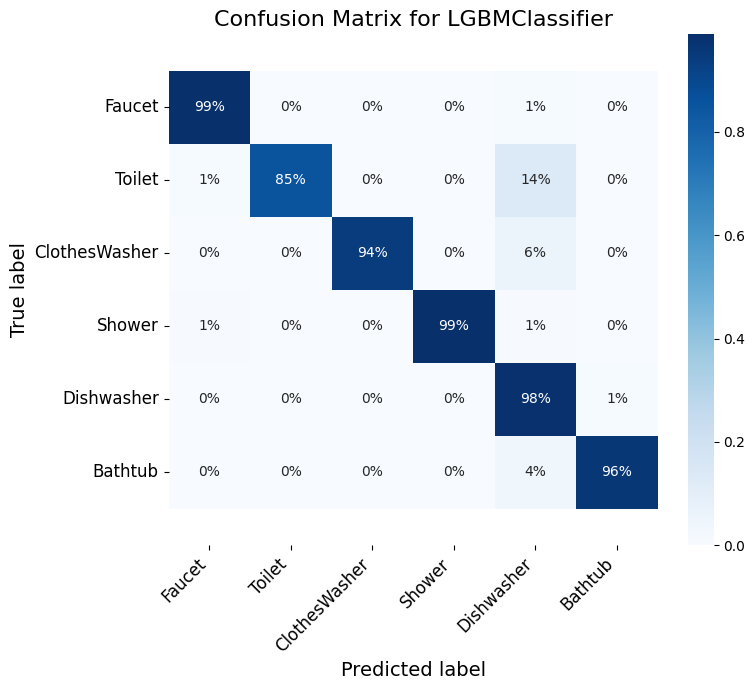

In [10]:
_, ax = get_confusion_matrix(y_test, y_hat, plot=True, labels=categories)
ax.set_title('Confusion Matrix for LGBMClassifier', fontsize=16)
plt.tight_layout()